In [18]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from fxpmath import Fxp

In [19]:
fpath_tb_image = os.path.join("tb_data", "tb_image_50x80_ap_fixed_16_2.bin")
fpath_tb_image_read_in = os.path.join("tb_data", "tb_image_READ_IN_50x80_ap_fixed_16_2.bin")
fpath_tb_output = os.path.join("tb_data", "OUTPUT_50x80_ap_fixed_16_2.bin")

# 1. Image data

## 1.a. Testbench image data 

from binary

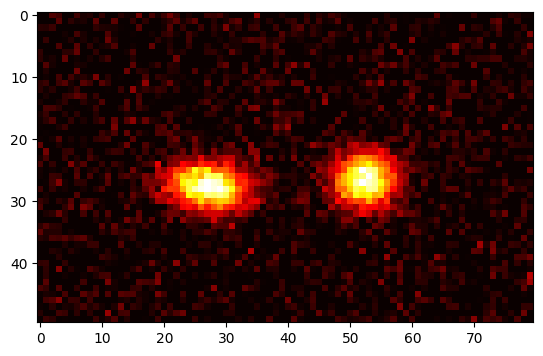

In [21]:
ap_fixed_16_2_example = Fxp(0.1, signed=True, n_word=16, n_frac=14)

tb_image = np.zeros((50*80), dtype=np.float32)
with open(fpath_tb_image, 'rb') as f:
    # x = Fxp('0b' + f.read())
    for i, line in enumerate(f.readlines()):
        # x = Fxp('0b' + line)
        x = str(line)
        x = x.replace("\\n", "")
        x = x.replace("b'", "")
        x = x.replace("'", "")
        x = Fxp('0b' + x, like = ap_fixed_16_2_example)
        tb_image[i] = x

tb_image = tb_image.reshape((50,80))
plt.imshow(tb_image, cmap='hot')


## 1.b. Image data that was read by verilog module

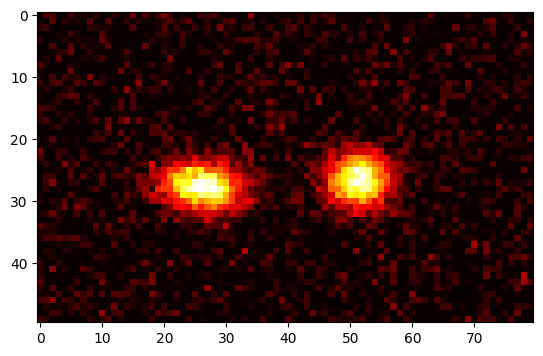

In [23]:
n_x_read = 0

tb_image_read_in = np.zeros((50*80), dtype=np.float32)
with open(fpath_tb_image_read_in, 'rb') as f:
    for i, line in enumerate(f.readlines()):
        if "x" in str(line):
            n_x_read += 1
            continue
        x = str(line)
        x = x.replace("\\n", "")
        x = x.replace("b'", "")
        x = x.replace("'", "")
        x = Fxp('0b' + x, like = ap_fixed_16_2_example)
        tb_image_read_in[i] = x

tb_image_read_in = tb_image_read_in.reshape((50,80))
plt.imshow(tb_image_read_in, cmap='hot')

In [24]:
n_x_read

3

Beautiful - so we're reading in the data correctly. 

# 2. Crop-coordinates data

## 2.a. Testbench crop-coordinates data

## 2.b. Crop-coordinates data that was read in by the verilog module

# 3. Cropped-image output

## 3.a. Output of C model

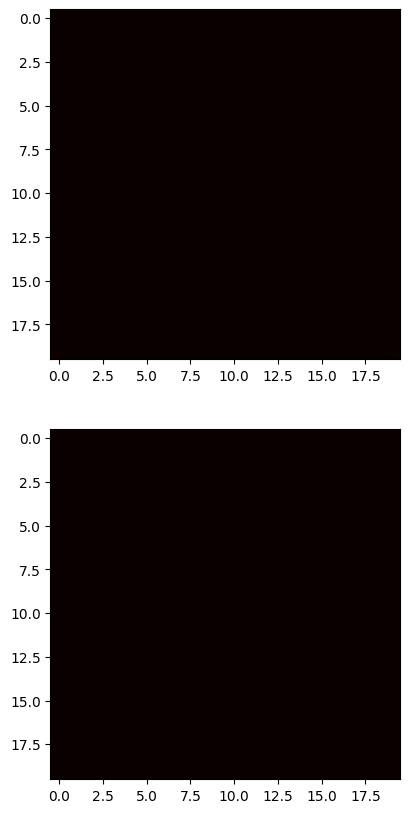

In [25]:
n_x_out = 0

tb_image_output = np.zeros((2*20*20), dtype=np.float32)
with open(fpath_tb_output, 'rb') as f:
    for i, line in enumerate(f.readlines()):
        if "x" in str(line):
            n_x_out += 1
            continue
        x = str(line)
        x = x.replace("\\n", "")
        x = x.replace("b'", "")
        x = x.replace("'", "")
        x = Fxp('0b' + x, like = ap_fixed_16_2_example)
        tb_image_output[i] = x

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
tb_image_output = tb_image_output.reshape((2, 20, 20))
for i in range(tb_image_output.shape[0]):
    axes[i].imshow(tb_image_output[i], cmap='hot')

In [26]:
n_x_out

0